## Feature Selection

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
df = pd.read_csv('data/df_fe.csv', sep=",", index_col=0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 0 to 1318
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1319 non-null   object 
 1   Stock              1319 non-null   object 
 2   Open               1319 non-null   float64
 3   Low                1319 non-null   float64
 4   Close              1319 non-null   float64
 5   Volume             1319 non-null   float64
 6   30_day_MA          1319 non-null   float64
 7   60_day_MA          1319 non-null   float64
 8   90_day_MA          1319 non-null   float64
 9   30_day_MA.1        1319 non-null   float64
 10  60_day_MA.1        1319 non-null   float64
 11  90_day_MA.1        1319 non-null   float64
 12  SMA_30             1319 non-null   float64
 13  SMA_60             1319 non-null   float64
 14  SMA_90             1319 non-null   float64
 15  EMA_30             1319 non-null   float64
 16  EMA_60             1319 non-n

In [54]:
df.describe()

,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,30_day_MA.1,60_day_MA.1,90_day_MA.1,...,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
count,1319.000000,1319.000000,1319.000000,1.319000e+03,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,...,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,282.069856,276.183510,279.294807,2.980024e+07,276.233821,272.946442,269.486835,276.233821,272.946442,269.486835,...,269.305125,57.776958,278.141231,276.638802,1.502429,1.514011,-0.011581,0.249138,801.241092,2.445792
std,68.385793,67.811316,68.190670,1.210729e+07,69.532063,71.162176,73.025717,69.532063,71.162176,73.025717,...,72.183583,25.496154,68.580976,69.187653,3.982047,3.742659,1.220305,2.137179,649.469231,1.322696
min,103.750000,101.349998,102.889999,8.989200e+06,95.654000,84.081833,72.937778,95.654000,84.081833,72.937778,...,77.922815,0.000000,99.938967,95.779211,-8.188473,-7.691589,-4.459230,-14.739031,154.000000,1.000000
25%,243.275002,237.360001,241.009995,2.215800e+07,239.074667,240.093250,238.565833,239.074667,240.093250,238.565833,...,241.131055,41.806966,239.373085,239.511291,-0.922043,-0.813454,-0.640137,-0.733540,435.500000,1.000000
50%,287.750000,280.489990,284.339996,2.707320e+07,278.823334,274.208168,272.960221,278.823334,274.208168,272.960221,...,273.006159,58.750501,284.733173,280.144942,1.913687,2.047732,0.031591,0.225927,650.000000,2.000000
75%,335.589996,328.444992,331.544998,3.345690e+07,330.509835,327.019252,327.304170,330.509835,327.019252,327.304170,...,327.541002,76.723494,331.012302,329.564336,4.321208,4.234656,0.682557,1.320672,941.500000,4.000000
max,384.299988,378.160004,382.700012,9.322640e+07,378.649004,376.117339,375.007892,378.649004,376.117339,375.007892,...,372.983680,100.000000,379.412022,378.318178,11.283020,10.412045,3.939028,14.216888,5369.000000,5.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 0 to 1318
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1319 non-null   object 
 1   Stock              1319 non-null   object 
 2   Open               1319 non-null   float64
 3   Low                1319 non-null   float64
 4   Close              1319 non-null   float64
 5   Volume             1319 non-null   float64
 6   30_day_MA          1319 non-null   float64
 7   60_day_MA          1319 non-null   float64
 8   90_day_MA          1319 non-null   float64
 9   30_day_MA.1        1319 non-null   float64
 10  60_day_MA.1        1319 non-null   float64
 11  90_day_MA.1        1319 non-null   float64
 12  SMA_30             1319 non-null   float64
 13  SMA_60             1319 non-null   float64
 14  SMA_90             1319 non-null   float64
 15  EMA_30             1319 non-null   float64
 16  EMA_60             1319 non-n

In [56]:
df['date'] = pd.to_datetime(df['date'])

# Select only the numerical columns from the DataFrame
df_numerical = df.select_dtypes(include=['int64', 'float64'])
# Correlation Analysis
corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,30_day_MA.1,60_day_MA.1,90_day_MA.1,SMA_30,SMA_60,SMA_90,EMA_30,EMA_60,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
Open,1.000000,0.999077,0.999147,-0.198982,0.989350,0.978529,0.966303,0.989350,0.978529,0.966303,0.989350,0.978529,0.966303,0.992250,0.982867,0.972275,-0.010598,0.997292,0.993403,-0.084374,-0.093154,0.010376,-0.017526,-0.000837,0.027036
Low,0.999077,1.000000,0.999257,-0.227121,0.987603,0.975801,0.962982,0.987603,0.975801,0.962982,0.987603,0.975801,0.962982,0.990663,0.980409,0.969245,-0.000292,0.996539,0.991970,-0.072438,-0.082332,0.016136,-0.017207,-0.001181,0.031895
Close,0.999147,0.999257,1.000000,-0.214618,0.987552,0.976377,0.963922,0.987552,0.976377,0.963922,0.987552,0.976377,0.963922,0.990675,0.980850,0.970019,0.004863,0.996364,0.991922,-0.074625,-0.086992,0.023289,0.007804,-0.000608,0.028807
Volume,-0.198982,-0.227121,-0.214618,1.000000,-0.190213,-0.182779,-0.182952,-0.190213,-0.182779,-0.182952,-0.190213,-0.182779,-0.182952,-0.194553,-0.189421,-0.188058,-0.103043,-0.203641,-0.195966,-0.102326,-0.077278,-0.096896,0.007350,-0.032508,-0.116431
30_day_MA,0.989350,0.987603,0.987552,-0.190213,1.000000,0.994263,0.984695,1.000000,0.994263,0.984695,1.000000,0.994263,0.984695,0.999390,0.996208,0.988872,-0.115031,0.995698,0.999167,-0.211978,-0.198647,-0.082472,-0.048308,0.003062,0.028344
60_day_MA,0.978529,0.975801,0.976377,-0.182779,0.994263,1.000000,0.996242,0.994263,1.000000,0.996242,0.994263,1.000000,0.996242,0.994499,0.999079,0.997036,-0.133866,0.985702,0.993059,-0.278001,-0.280182,-0.047847,-0.045331,0.011898,0.022663
90_day_MA,0.966303,0.962982,0.963922,-0.182952,0.984695,0.996242,1.000000,0.984695,0.996242,1.000000,0.984695,0.996242,1.000000,0.985579,0.995841,0.998785,-0.145328,0.974127,0.983443,-0.310276,-0.319425,-0.032806,-0.045303,0.017858,0.014455
30_day_MA.1,0.989350,0.987603,0.987552,-0.190213,1.000000,0.994263,0.984695,1.000000,0.994263,0.984695,1.000000,0.994263,0.984695,0.999390,0.996208,0.988872,-0.115031,0.995698,0.999167,-0.211978,-0.198647,-0.082472,-0.048308,0.003062,0.028344
60_day_MA.1,0.978529,0.975801,0.976377,-0.182779,0.994263,1.000000,0.996242,0.994263,1.000000,0.996242,0.994263,1.000000,0.996242,0.994499,0.999079,0.997036,-0.133866,0.985702,0.993059,-0.278001,-0.280182,-0.047847,-0.045331,0.011898,0.022663
90_day_MA.1,0.966303,0.962982,0.963922,-0.182952,0.984695,0.996242,1.000000,0.984695,0.996242,1.000000,0.984695,0.996242,1.000000,0.985579,0.995841,0.998785,-0.145328,0.974127,0.983443,-0.310276,-0.319425,-0.032806,-0.045303,0.017858,0.014455


#### onehotencoding 

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

artists_column = df['Stock'].values.reshape(-1, 1)

one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df['Stock'] = np.argmax(one_hot_encoded_artists, axis=1)

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['DayOfWeek'] = df['date'].dt.dayofweek
# Converting to seconds since the epoch
df['Timestamp'] = df['date'].astype('int64') // 10**9



#### Feature Importance

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

df['date'] = pd.to_datetime(df['date'])


X = df.drop('Price_Change_Pct', axis=1) 
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

#df['Date'] = pd.to_datetime(df['Date'])


X = df.drop(['Price_Change_Pct','date'], axis=1) 
y = df['Price_Change_Pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor 


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [62]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


              Feature  Importance
4              Volume    0.336052
22     MACD_Histogram    0.138628
17                RSI    0.087414
21        Signal_Line    0.060578
27                Day    0.049564
20               MACD    0.043903
26              Month    0.033725
23     Article Length    0.032022
3               Close    0.025870
29          Timestamp    0.023181
28          DayOfWeek    0.023156
2                 Low    0.017664
1                Open    0.015036
18             EMA_12    0.011650
13             SMA_90    0.009289
5           30_day_MA    0.008445
7           90_day_MA    0.008415
24  article_sentiment    0.008171
16             EMA_90    0.007706
19             EMA_26    0.007365
15             EMA_60    0.007355
8         30_day_MA.1    0.007252
10        90_day_MA.1    0.006346
11             SMA_30    0.006121
9         60_day_MA.1    0.006029
12             SMA_60    0.005322
14             EMA_30    0.004912
6           60_day_MA    0.004899
25            

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

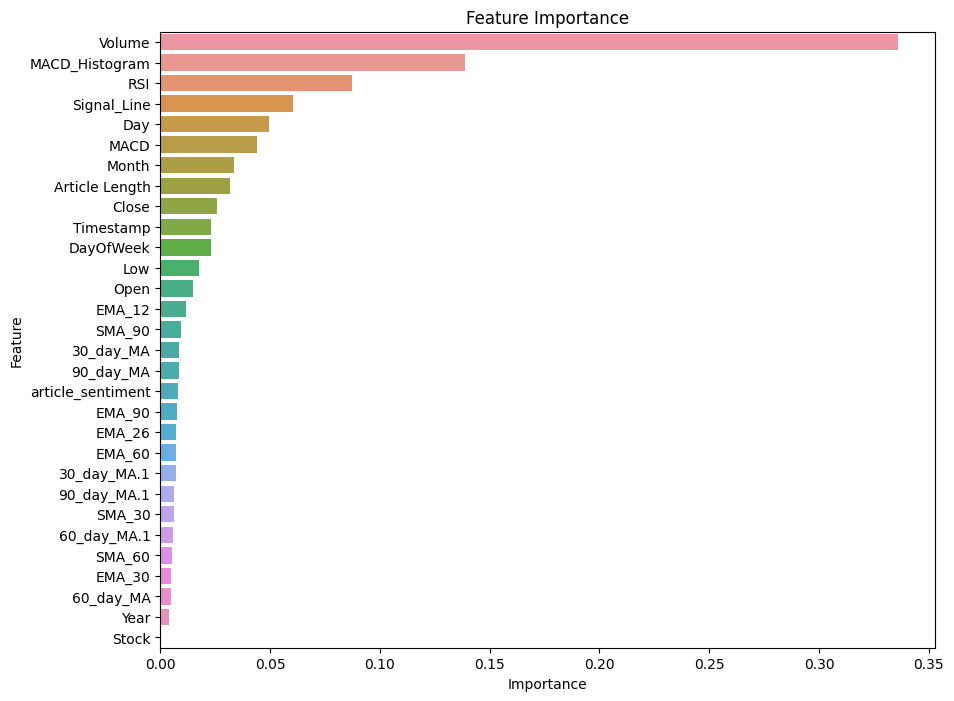

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Recursive Feature Elimination (RFE):
RFE is a technique that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 

In [64]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(random_state=42)

# Initialize RFE with the estimator and the desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1) 
selector = selector.fit(X_train, y_train)
 
selected_features_mask = selector.support_

feature_ranking = selector.ranking_

# Transform the dataset to the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
 
selected_features = X_train.columns[selected_features_mask]
print(f"Selected features: {selected_features}")

# And to see the ranking of all features
ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})
print(ranking_df.sort_values(by='Ranking'))


Selected features: Index(['Close', 'Volume', '90_day_MA.1', 'RSI', 'MACD', 'Signal_Line',
       'MACD_Histogram', 'Month', 'Day', 'Timestamp'],
      dtype='object')
              Feature  Ranking
29          Timestamp        1
20               MACD        1
17                RSI        1
21        Signal_Line        1
10        90_day_MA.1        1
26              Month        1
22     MACD_Histogram        1
4              Volume        1
3               Close        1
27                Day        1
2                 Low        2
23     Article Length        3
8         30_day_MA.1        4
28          DayOfWeek        5
1                Open        6
18             EMA_12        7
16             EMA_90        8
12             SMA_60        9
19             EMA_26       10
13             SMA_90       11
15             EMA_60       12
24  article_sentiment       13
7           90_day_MA       14
14             EMA_30       15
5           30_day_MA       16
6           60_day_MA      

#### PCA test

##### reduce redundancy 

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA. For example, to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Interpret the results
print(f"Number of components to explain 95% variance: {pca.n_components_}")
print(f"Explained variance by component: {pca.explained_variance_ratio_}")

# 'X_pca' is the transformed data with reduced dimensions


Number of components to explain 95% variance: 8
Explained variance by component: [0.64190421 0.09314288 0.04452014 0.03986866 0.03722307 0.03497792
 0.03210193 0.02982555]


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your data

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# variance tells you how much information (variance) can be attributed to each principal component
print(pca.explained_variance_ratio_)

[0.64289004 0.09307107 0.04385491 0.03963939 0.03766803 0.03542577
 0.03210086 0.02910879]


In [67]:
X_train_pca

array([[ 1.3245194 ,  1.15627239,  0.11576395, ...,  0.32028248,
        -1.70312979, -0.21505844],
       [-6.06452033,  0.96448121, -0.72002672, ..., -0.73958371,
        -0.6937306 ,  0.02608153],
       [ 3.92191179,  0.05728388, -0.2756514 , ...,  0.84548108,
        -1.00785222,  1.11066604],
       ...,
       [-5.97080847, -0.40380079, -0.90889947, ...,  1.03424339,
        -0.16129526, -0.70354246],
       [-1.51466405, -0.5432357 ,  0.13935699, ..., -1.28735878,
         0.51934759,  0.71741178],
       [-3.74906089, -2.02645674,  0.33509573, ..., -1.30417595,
        -0.0532669 ,  0.25060096]])